# Resume Classification

In [191]:
!pip install python-docx

In [192]:
from docx import Document
import pandas as pd


In [193]:
 # Load the file
file_path = '/content/Master Resume.docx'

In [194]:
# Load the .docx file
document = Document(file_path)

In [195]:
# Extract text from the .docx file
content = [paragraph.text.strip() for paragraph in document.paragraphs if paragraph.text.strip()]


In [196]:
# Create a DataFrame
df = pd.DataFrame({'content': content, 'profile': ['Master Resume'] * len(content)})
df

,content,profile
0,Chinna Subbarayudu M,Master Resume
1,DOB: 06th March 1994,Master Resume
2,Nationality: Indian,Master Resume
3,PROFILE SUMMARY:,Master Resume
4,Having around 5.1 years of IT experience in de...,Master Resume
...,...,...
4670,"Responsible for writing complex SQL Queries, J...",Master Resume
4671,Experience in creating different types of Repo...,Master Resume
4672,Involved in deploying and scheduling the repor...,Master Resume
4673,Involved in scheduling the Stored procedures t...,Master Resume


In [197]:
# Display the DataFrame
print(df.head())

                                             content        profile
0                               Chinna Subbarayudu M  Master Resume
1                               DOB: 06th March 1994  Master Resume
2                                Nationality: Indian  Master Resume
3                                   PROFILE SUMMARY:  Master Resume
4  Having around 5.1 years of IT experience in de...  Master Resume


In [198]:
# Create a DataFrame
df = pd.DataFrame({'content': content, 'profile': ['Master Resume'] * len(content)})


In [199]:
# Optionally save the DataFrame to a CSV file
df.to_csv('extracted_resume_data.csv', index=False)

# EDA

In [200]:
pip install pandas matplotlib seaborn nltk wordcloud


In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from collections import Counter
import string

In [202]:
# Download NLTK data
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [203]:
# Load the DataFrame (Replace 'your_dataframe.csv' with your dataset file if saved)
df = pd.read_csv('extracted_resume_data.csv')

In [204]:
# Quick look at the data
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
                                             content        profile
0                               Chinna Subbarayudu M  Master Resume
1                               DOB: 06th March 1994  Master Resume
2                                Nationality: Indian  Master Resume
3                                   PROFILE SUMMARY:  Master Resume
4  Having around 5.1 years of IT experience in de...  Master Resume


In [205]:
# Data Overview
print("\nData Information:")
print(df.info())


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4675 entries, 0 to 4674
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  4675 non-null   object
 1   profile  4675 non-null   object
dtypes: object(2)
memory usage: 73.2+ KB
None


In [206]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
content    0
profile    0
dtype: int64


In [207]:
# Basic statistics on text length
df['content_length'] = df['content'].apply(len)
print("\nBasic Statistics for Content Length:")
print(df['content_length'].describe())



Basic Statistics for Content Length:
count    4675.000000
mean       75.551016
std        69.005142
min         1.000000
25%        29.000000
50%        63.000000
75%        99.000000
max      1053.000000
Name: content_length, dtype: float64


In [208]:
# 1. Drop the 'Unnamed: 0' column if it's just a row index
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

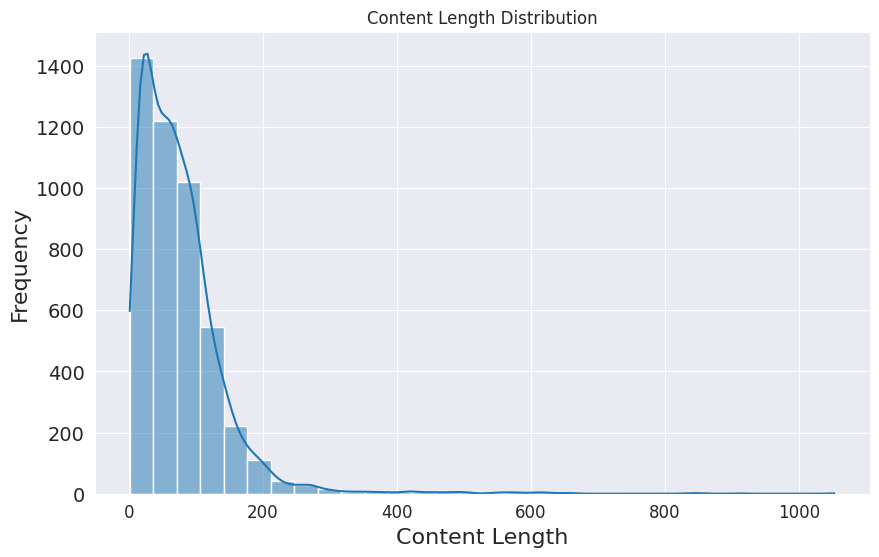

In [209]:
# Visualization: Content Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['content_length'], kde=True, bins=30)
plt.title('Content Length Distribution')
plt.xlabel('Content Length')
plt.ylabel('Frequency')
plt.show()


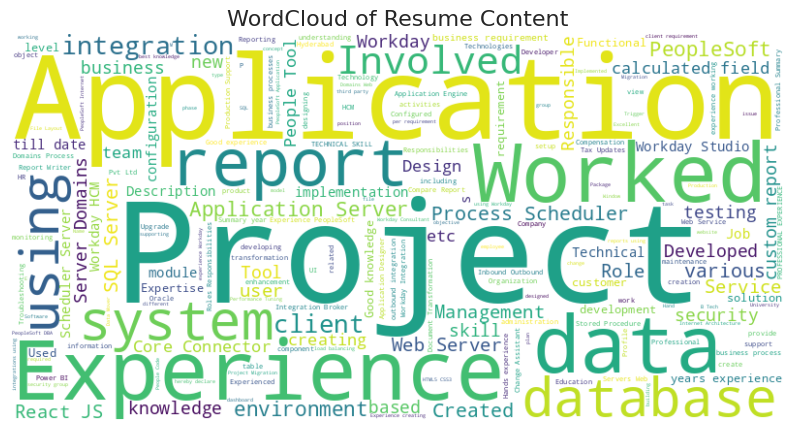

In [210]:
# WordCloud of the most frequent words
stop_words = set(stopwords.words('english'))
content_words = ' '.join(df['content'])
content_words_cleaned = ' '.join([word for word in content_words.split() if word.lower() not in stop_words])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(content_words_cleaned)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Resume Content', fontsize=16)
plt.show()

In [211]:
# Top 20 most frequent words
content_words_split = content_words_cleaned.split()
word_counts = Counter(content_words_split)
most_common_words = word_counts.most_common(20)


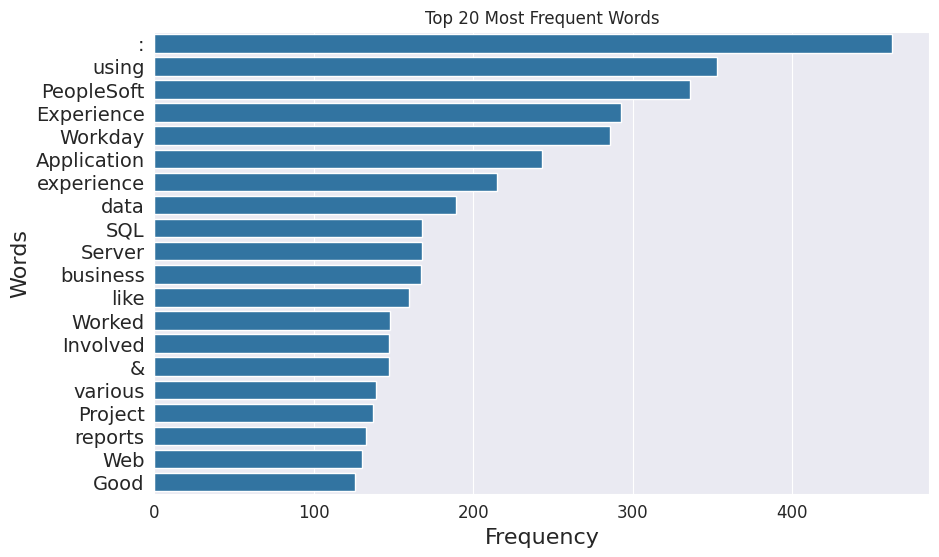

In [212]:
# Visualization: Top 20 Words
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words))
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

In [213]:
# Count unique words
unique_words_count = len(set(content_words_cleaned.split()))
print("\nNumber of Unique Words:", unique_words_count)



Number of Unique Words: 8335


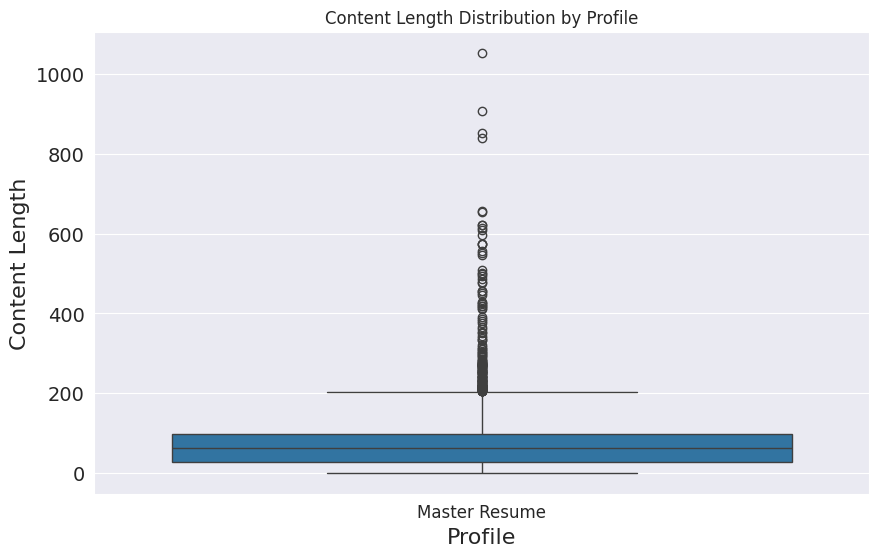

In [214]:
# Content Length Analysis by Profile
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='profile', y='content_length')
plt.title('Content Length Distribution by Profile')
plt.xlabel('Profile')
plt.ylabel('Content Length')
plt.show()

In [215]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['content_length'].quantile(0.25)
Q3 = df['content_length'].quantile(0.75)


In [216]:
# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

In [217]:
# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [218]:
# Option 1: Remove outliers
df_no_outliers = df[(df['content_length'] >= lower_bound) & (df['content_length'] <= upper_bound)]


In [219]:
# Option 2: Clip outliers
df['content_length_clipped'] = df['content_length'].clip(lower=lower_bound, upper=upper_bound)

In [220]:
# Display the cleaned DataFrame
print(f"Original Data: {len(df)}, Without Outliers: {len(df_no_outliers)}")


Original Data: 4675, Without Outliers: 4530


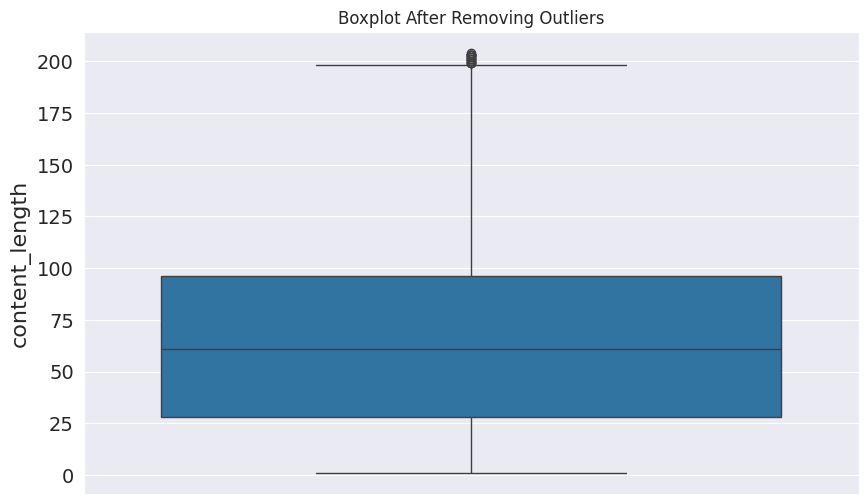

In [221]:
# Visualize after removing or clipping outliers
plt.figure(figsize=(10, 6))
sns.boxplot(df_no_outliers['content_length'])
plt.title("Boxplot After Removing Outliers")
plt.show()

In [222]:
import numpy as np

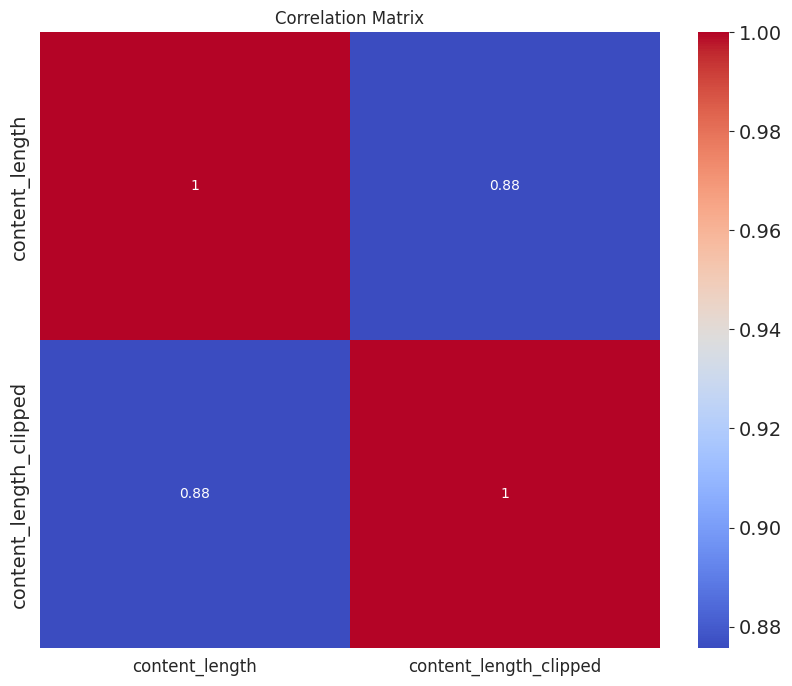

In [223]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
# Select only numerical features for correlation
numerical_df = df.select_dtypes(include=np.number)  # Select numerical columns
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Model building

In [224]:
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score


import warnings
warnings.filterwarnings('ignore')

In [225]:
document = Document(file_path)

In [226]:
import re

In [227]:
# Import necessary libraries
import re
from docx import Document

# Load the file
file_path = '/content/Master Resume.docx'  # Replace with your file path
document = Document(file_path)

# Function to split the document into sections
def split_into_sections(document):
    # Extract the full text from the document
    full_text = "\n".join([paragraph.text for paragraph in document.paragraphs])

    # Split the full text using the regular expression
    sections = re.split(r"(?i)(PROFILE SUMMARY|PROFESSIONAL SUMMARY|ROLES & RESPONSIBILITIES):", full_text)

    # Extract content and profiles from sections
    content, profiles = [], []
    for i in range(1, len(sections), 2):
        profiles.append(sections[i].strip())
        content.append(sections[i + 1].strip() if i + 1 < len(sections) else "")

    return pd.DataFrame({'Profile': profiles, 'Content': content})

# Now call the function with the document object
df = split_into_sections(document)

# Print results
print("DataFrame created with Content and Profile columns:")
print(df.head())

DataFrame created with Content and Profile columns:
                Profile                                            Content
0       PROFILE SUMMARY  Having around 5.1 years of IT experience in de...
1  PROFESSIONAL SUMMARY  Have total 5.7 years of experience in Informat...
2       PROFILE SUMMARY  Having around 6 years of IT experience in deve...
3  Professional Summary  Having 5+  years of extensive experience in IT...
4  PROFESSIONAL SUMMARY  An ERP Consultant with overall 5+ years of pro...


In [228]:
#Load Data
# Assuming df is already prepared with 'Content' and 'Profile' columns.
X = df['Content']
y = df['Profile']

In [229]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [230]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=45, test_size=0.25,stratify=y)
x_train.shape, x_test.shape


((24,), (8,))

In [231]:
tfidf_vector = TfidfVectorizer(sublinear_tf=True,stop_words='english')


In [232]:
x_train = tfidf_vector.fit_transform(x_train)
x_test = tfidf_vector.transform(x_test)

In [233]:
x_train.shape, x_test.shape

((24, 3574), (8, 3574))

In [234]:
print(y_train),print(y_test)

14        PROFESSIONAL SUMMARY
19        Professional Summary
4         PROFESSIONAL SUMMARY
10        Professional Summary
5              PROFILE SUMMARY
27        Professional summary
26    Roles & Responsibilities
25    Roles & Responsibilities
16        PROFESSIONAL SUMMARY
24    Roles & Responsibilities
22    Roles & Responsibilities
9         PROFESSIONAL SUMMARY
13        Professional Summary
12        Professional Summary
3         Professional Summary
18    Roles & Responsibilities
30        Professional Summary
2              PROFILE SUMMARY
21             Profile Summary
31        Professional summary
20    Roles & Responsibilities
1         PROFESSIONAL SUMMARY
11        Professional Summary
17        Professional Summary
Name: Profile, dtype: object
0              PROFILE SUMMARY
28        Professional summary
7         Professional Summary
6     Roles & Responsibilities
8              Profile Summary
15        PROFESSIONAL SUMMARY
29        Professional Summary
23    Role

(None, None)

#Classification Models

#Logistic Regression

In [235]:
model_lgr = LogisticRegression()
model_lgr.fit(x_train, y_train)
y_pred = model_lgr.predict(x_test)
accuracy_lgr = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_lgr.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_lgr.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_lgr,classification_report(y_test, y_pred)))
nb_score = model_lgr.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_lgr = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_lgr = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_lgr = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_lgr = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.75
Accuracy of  test set    : 0.25
Classification report for classifier LogisticRegression():
                          precision    recall  f1-score   support

    PROFESSIONAL SUMMARY       0.00      0.00      0.00         1
         PROFILE SUMMARY       0.00      0.00      0.00         1
    Professional Summary       0.17      0.50      0.25         2
    Professional summary       0.00      0.00      0.00         1
         Profile Summary       0.00      0.00      0.00         1
Roles & Responsibilities       0.50      0.50      0.50         2

                accuracy                           0.25         8
               macro avg       0.11      0.17      0.12         8
            weighted avg       0.17      0.25      0.19         8




#Decision Tree Classifier

In [236]:
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(x_train, y_train)
y_pred = model_DT.predict(x_test)
accuracy_DT = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_DT.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_DT.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_DT,classification_report(y_test, y_pred)))
nb_score = model_DT.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.38
Classification report for classifier DecisionTreeClassifier():
                          precision    recall  f1-score   support

    PROFESSIONAL SUMMARY       0.00      0.00      0.00         1
         PROFILE SUMMARY       0.50      1.00      0.67         1
    Professional Summary       0.00      0.00      0.00         2
    Professional summary       1.00      1.00      1.00         1
         Profile Summary       0.00      0.00      0.00         1
Roles & Responsibilities       0.33      0.50      0.40         2

                accuracy                           0.38         8
               macro avg       0.31      0.42      0.34         8
            weighted avg       0.27      0.38      0.31         8




#Random Forest Classifier

In [237]:
model_RF = RandomForestClassifier(n_estimators=200)
model_RF.fit(x_train, y_train)
y_pred = model_RF.predict(x_test)
accuracy_RF = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_RF.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_RF.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_RF,classification_report(y_test, y_pred)))
nb_score = model_RF.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.25
Classification report for classifier RandomForestClassifier(n_estimators=200):
                          precision    recall  f1-score   support

    PROFESSIONAL SUMMARY       0.00      0.00      0.00         1
         PROFILE SUMMARY       0.00      0.00      0.00         1
    Professional Summary       0.50      0.50      0.50         2
    Professional summary       0.00      0.00      0.00         1
         Profile Summary       0.00      0.00      0.00         1
Roles & Responsibilities       0.25      0.50      0.33         2

                accuracy                           0.25         8
               macro avg       0.12      0.17      0.14         8
            weighted avg       0.19      0.25      0.21         8




#Support Vector Machine (SVM) Classifier

In [238]:
model_svm = SVC()
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_svm.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_svm,classification_report(y_test, y_pred)))
nb_score = model_svm.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.92
Accuracy of  test set    : 0.25
Classification report for classifier SVC():
                          precision    recall  f1-score   support

    PROFESSIONAL SUMMARY       0.00      0.00      0.00         1
         PROFILE SUMMARY       0.00      0.00      0.00         1
    Professional Summary       0.25      1.00      0.40         2
    Professional summary       0.00      0.00      0.00         1
         Profile Summary       0.00      0.00      0.00         1
Roles & Responsibilities       0.00      0.00      0.00         2

                accuracy                           0.25         8
               macro avg       0.04      0.17      0.07         8
            weighted avg       0.06      0.25      0.10         8




#Bagging Classifier

In [239]:
model_bagg = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
model_bagg.fit(x_train, y_train)
y_pred = model_bagg.predict(x_test)
accuracy_bagg = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_bagg.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_bagg.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_bagg,classification_report(y_test, y_pred)))
nb_score = model_bagg.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_bagg = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_bagg = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_bagg = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_bagg = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.42
Accuracy of  test set    : 0.25
Classification report for classifier BaggingClassifier(estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5):
                          precision    recall  f1-score   support

    PROFESSIONAL SUMMARY       0.00      0.00      0.00         1
         PROFILE SUMMARY       0.00      0.00      0.00         1
    Professional Summary       0.33      0.50      0.40         2
    Professional summary       0.00      0.00      0.00         1
         Profile Summary       0.00      0.00      0.00         1
Roles & Responsibilities       0.33      0.50      0.40         2

                accuracy                           0.25         8
               macro avg       0.11      0.17      0.13         8
            weighted avg       0.17      0.25      0.20         8




#AdaBoost Classifier

In [240]:
model_Adaboost = AdaBoostClassifier(n_estimators=100)
model_Adaboost.fit(x_train, y_train)
y_pred = model_Adaboost.predict(x_test)
accuracy_Adaboost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_Adaboost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_Adaboost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_Adaboost,classification_report(y_test, y_pred)))
nb_score = model_Adaboost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Adaboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Adaboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Adaboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Adaboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.58
Accuracy of  test set    : 0.12
Classification report for classifier AdaBoostClassifier(n_estimators=100):
                          precision    recall  f1-score   support

    PROFESSIONAL SUMMARY       0.00      0.00      0.00         1
         PROFILE SUMMARY       0.00      0.00      0.00         1
    Professional Summary       0.20      0.50      0.29         2
    Professional summary       0.00      0.00      0.00         1
         Profile Summary       0.00      0.00      0.00         1
Roles & Responsibilities       0.00      0.00      0.00         2

                accuracy                           0.12         8
               macro avg       0.03      0.08      0.05         8
            weighted avg       0.05      0.12      0.07         8




#Gradient Boosting Classifier

In [241]:
model_GradientBoost = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1, random_state=0)
model_GradientBoost.fit(x_train, y_train)
y_pred = model_GradientBoost.predict(x_test)
accuracy_GradientBoost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_GradientBoost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_GradientBoost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_GradientBoost,classification_report(y_test, y_pred)))
nb_score = model_GradientBoost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Gradientboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Gradientboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Gradientboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Gradientboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.38
Classification report for classifier GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0):
                          precision    recall  f1-score   support

    PROFESSIONAL SUMMARY       0.00      0.00      0.00         1
         PROFILE SUMMARY       0.50      1.00      0.67         1
    Professional Summary       0.50      0.50      0.50         2
    Professional summary       0.00      0.00      0.00         1
         Profile Summary       0.00      0.00      0.00         1
Roles & Responsibilities       0.25      0.50      0.33         2

                accuracy                           0.38         8
               macro avg       0.21      0.33      0.25         8
            weighted avg       0.25      0.38      0.29         8




#Naive Bayes Classifier

In [242]:
model_NB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
model_NB.fit(x_train, y_train)
y_pred = model_NB.predict(x_test)
accuracy_NB = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_NB.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_NB.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_NB,classification_report(y_test, y_pred)))
nb_score = model_NB.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_NB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_NB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_NB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_NB = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.96
Accuracy of  test set    : 0.25
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
                          precision    recall  f1-score   support

    PROFESSIONAL SUMMARY       0.00      0.00      0.00         1
         PROFILE SUMMARY       0.00      0.00      0.00         1
    Professional Summary       0.20      0.50      0.29         2
    Professional summary       0.00      0.00      0.00         1
         Profile Summary       0.00      0.00      0.00         1
Roles & Responsibilities       0.33      0.50      0.40         2

                accuracy                           0.25         8
               macro avg       0.09      0.17      0.11         8
            weighted avg       0.13      0.25      0.17         8




#Model Evaluation

In [243]:
Evaluation = {"Models":["DecisionTree Classifier","RandomForest Classifier","SVM Classifier",
                        "Logistic Regression","Bagging Classifier","AdaBoost Classifier","Gradient Boosting Classifier","Naive Bayes Classifier"],\
            "Train_Accuracy(%)":[model_DT.score(x_train, y_train),model_RF.score(x_train, y_train),model_svm.score(x_train, y_train),model_lgr.score(x_train, y_train),
                                 model_bagg.score(x_train, y_train),model_Adaboost.score(x_train, y_train),model_GradientBoost.score(x_train, y_train), model_NB.score(x_train, y_train)],
            "Test_Accuracy(%)":[accuracy_DT,accuracy_RF,accuracy_svm,accuracy_lgr,accuracy_bagg,accuracy_Adaboost,accuracy_GradientBoost,accuracy_NB],\
            "Precision(%)":[precision_DT,precision_RF,precision_svm,precision_lgr,precision_bagg,precision_Adaboost,precision_Gradientboost,precision_NB],\
            "Recall(%)":[recall_DT,recall_RF,recall_svm,recall_lgr,recall_bagg,recall_Adaboost,recall_Gradientboost,recall_NB],\
            "F1-Score(%)":[f1_DT,f1_RF,f1_svm,f1_lgr,f1_bagg,f1_Adaboost,f1_Gradientboost,f1_NB]}
table = pd.DataFrame(Evaluation)
table

,Models,Train_Accuracy(%),Test_Accuracy(%),Precision(%),Recall(%),F1-Score(%)
0,DecisionTree Classifier,1.000000,0.380,0.31,0.42,0.34
1,RandomForest Classifier,1.000000,0.250,0.12,0.17,0.14
2,SVM Classifier,0.916667,0.250,0.04,0.17,0.07
3,Logistic Regression,0.750000,0.250,0.11,0.17,0.12
4,Bagging Classifier,0.416667,0.250,0.11,0.17,0.13
5,AdaBoost Classifier,0.583333,0.120,0.03,0.08,0.05
6,Gradient Boosting Classifier,1.000000,0.375,0.21,0.33,0.25
7,Naive Bayes Classifier,0.958333,0.250,0.09,0.17,0.11


In [244]:
model_names = ["DecisionTree","RandomForest ","SVM ", "Logistic Regression",
               "Bagging","AdaBoost","Gradient Boosting ","Naive Bayes"]
Test_accuracies = [accuracy_DT*100,accuracy_RF*100,
              accuracy_svm*100,accuracy_lgr*100,accuracy_bagg*100,
              accuracy_Adaboost*100,accuracy_GradientBoost*100,accuracy_NB*100]
Train_accuracies=[model_DT.score(x_train, y_train)*100,
                  model_RF.score(x_train, y_train)*100,model_svm.score(x_train, y_train)*100,
                  model_lgr.score(x_train, y_train)*100,model_bagg.score(x_train, y_train)*100,
                  model_Adaboost.score(x_train, y_train)*100,model_GradientBoost.score(x_train, y_train)*100,
                  model_NB.score(x_train, y_train)*100]

#Train and Test Accuracy Plot

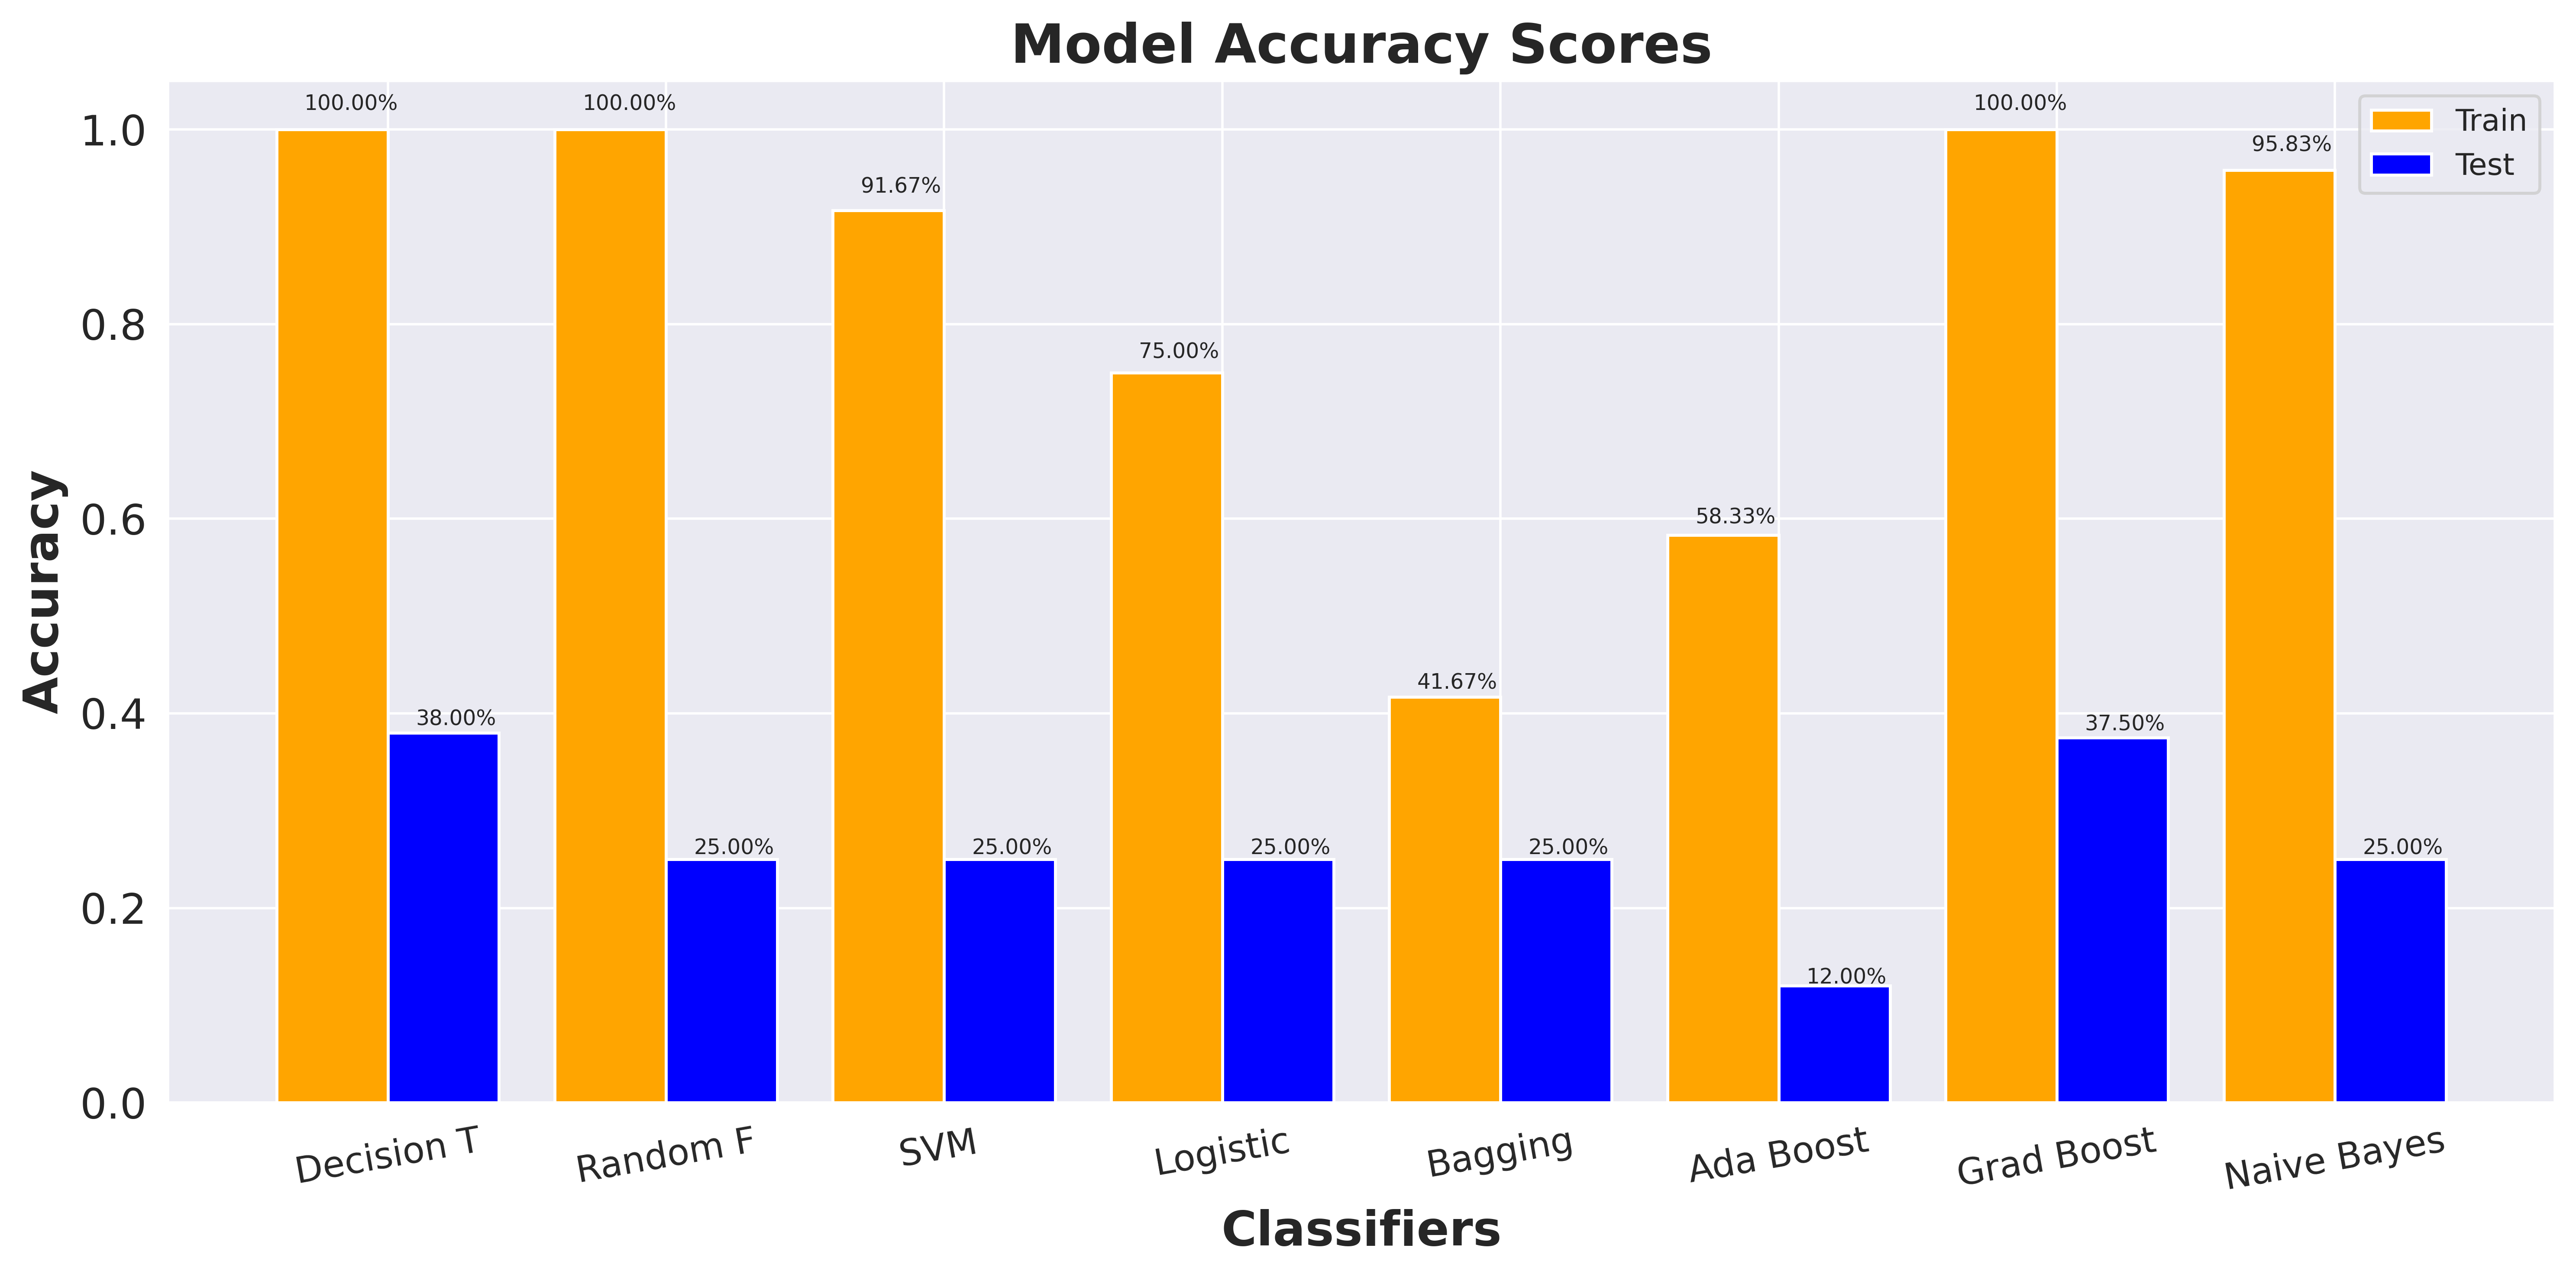

In [245]:
import matplotlib.pyplot as plt
import numpy as np

rcParams = {'xtick.labelsize':'12','ytick.labelsize':'14','axes.labelsize':'16'}
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=500)
x_pos = np.arange(len(table))
model_names = [ "Decision T", "Random F", "SVM ", "Logistic", "Bagging", "Ada Boost", "Grad Boost","Naive Bayes"]

bar1 = plt.bar(x_pos - 0.2, table['Train_Accuracy(%)'], width=0.4, label='Train', color= "Orange")
bar2 = plt.bar(x_pos + 0.2, table['Test_Accuracy(%)'], width=0.4, label='Test', color= "b")
plt.xticks(x_pos, model_names)

plt.xlabel("Classifiers", fontsize = 16, fontweight = 'bold')
plt.ylabel("Accuracy", fontsize = 16, fontweight = 'bold')
plt.title("Model Accuracy Scores", fontsize = 18, fontweight = 'bold')
plt.xticks(rotation = 10)
plt.legend()

for i, bar in enumerate(bar1):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02,
             s = '{:.2f}%'.format(Train_accuracies[i]), fontsize = 7)

for i, bar in enumerate(bar2):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02,
             s = '{:.2f}%'.format(Test_accuracies[i]), fontsize = 7)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG\Mod_Acc_Bar', dpi = 500)

#Based on the accuracy, the best model is decision tree....